# IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
pip install spicy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import scipy.stats as st

In [168]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 16.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [169]:
from statsmodels.stats.proportion import proportions_ztest

# Clients

In [4]:
clients = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Projects/ab_test_project/data/df_final_demo.txt")

**Meaning of variables:**

- `client_id:` Every client’s unique ID.
- `clnt_tenure_yr:` Represents how long the client has been with Vanguard, measured in years.
- `clnt_tenure_mnth:` Further breaks down the client’s tenure with Vanguard in months.
- `clnt_age:` Indicates the age of the client.
- `gendr:` Specifies the client’s gender.
- `num_accts:` Denotes the number of accounts the client holds with Vanguard.
- `bal:` Gives the total balance spread across all accounts for a particular client.
- `calls_6_mnth:` Records the number of times the client reached out over a call in the past six months.
- `logons_6_mnth:` Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [6]:
# Renombrar columnas para que sean mas claras.
clients.rename(columns={'gendr': 'gender',
                       'num_accts': 'num_accounts',
                       'bal': 'balance'}, inplace=True)

In [7]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accounts,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


# Experiments

In [8]:
experiment = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Projects/ab_test_project/data/df_final_experiment_clients.txt")

**Meaning of variables:**

- `client_id:` Every client’s unique ID.
- `variation:` Indicates if a client was part of the experiment.

In [9]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [10]:
experiment.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [11]:
experiment.rename(columns={'Variation': 'variation'}, inplace=True)

In [12]:
experiment["variation"].unique()

array(['Test', 'Control', nan], dtype=object)

In [13]:
experiment["variation"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
70604     True
70605     True
70606     True
70607     True
70608     True
Name: variation, Length: 70609, dtype: bool

`Control Group:`Clients interacted with Vanguard’s traditional online process.

`Test Group:` Clients experienced the new, spruced-up digital interface.

In [14]:
experiment["variation"] = experiment["variation"].fillna('Not participate')

In [15]:
experiment.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [16]:
experiment["variation"].unique()

array(['Test', 'Control', 'Not participate'], dtype=object)

In [17]:
experiment["variation"].value_counts()

variation
Test               26968
Control            23532
Not participate    20109
Name: count, dtype: int64

# Webs data

**Meaning of variables:**

- `client_id:` Every client’s unique ID.
- `visitor_id:` A unique ID for each client-device combination.
- `visit_id:` A unique ID for each web visit/session.
- `process_step:` Marks each step in the digital process.
- `date_time:` Timestamp of each web activity.

In [18]:
web_1 = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Projects/ab_test_project/data/df_final_web_data_pt_1.txt")

In [19]:
web_2 = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Projects/ab_test_project/data/df_final_web_data_pt_2.txt")

In [20]:
web_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [21]:
web_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [22]:
web_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [23]:
# Unir ambos dataframes.
concat = pd.concat([web_1, web_2], ignore_index=True)

In [24]:
concat.shape

(755405, 5)

In [25]:
# Check cuantos duplicados tiene. 
duplicates = concat.duplicated().sum()
duplicates

10764

In [26]:
concat.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [27]:
# Eliminar duplicados. 
webs = concat.drop_duplicates()

In [28]:
webs.shape

(744641, 5)

In [257]:
#webs.to_csv('webs_ok.csv', index=False)

In [239]:
#experiment.to_csv('experiment.csv', index=False)

In [240]:
#clients.to_csv('client.csv', index=False)

# Questions about demographics:

`Who are the primary clients using this online process?`

In [29]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accounts,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [30]:
primary_clnt_tenure = clients.sort_values(by="clnt_tenure_yr", ascending=False).head(100)

In [31]:
primary_clnt_tenure.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accounts,balance,calls_6_mnth,logons_6_mnth
64690,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0
12871,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0
56608,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0
30335,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0
11329,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0


In [32]:
primary_clnt_balance = clients.sort_values(by='balance', ascending=False).head(100)

In [33]:
primary_clnt_balance.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accounts,balance,calls_6_mnth,logons_6_mnth
39367,9286288,21.0,254.0,62.5,M,3.0,16320040.15,6.0,9.0
63746,8339240,6.0,80.0,26.5,M,2.0,12838418.01,3.0,3.0
23849,7070097,11.0,133.0,53.0,M,2.0,8986419.77,6.0,9.0
13318,9440656,7.0,94.0,63.0,F,2.0,8292996.21,6.0,9.0
2171,2291985,7.0,85.0,41.0,M,2.0,8247729.97,1.0,4.0


Based on the assumption that all of Vanguard's clients use the online process, we define primary clients as those with the longest tenure and those with the highest balance.

---

Partiendo de la base de que todos los clientes de Vanguard’s usan el proceso online, definimos que los primary clients son aquellos que tienen una permanencia en años de más tiempo y aquellos que cuentan con un balance superior. 

`Are the primary clients younger or older, new or long-standing?`

In [34]:
primary_clients = pd.concat([primary_clnt_tenure, primary_clnt_balance], ignore_index=True)

In [35]:
primary_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accounts,balance,calls_6_mnth,logons_6_mnth
0,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0
1,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0
2,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0
3,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0
4,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0


In [36]:
primary_clients.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [37]:
# To see the ages of the primary clients
unique_clnt_age = primary_clients["clnt_age"].unique()
unique_clnt_age_sorted = sorted(unique_clnt_age, reverse=True)

In [38]:
# Fuction to filter per age.

def get_age_group(age):
    if age >= 18 and age <= 30:
        return 'youth'
    elif age >= 31 and age <= 50:
        return 'adulthood'
    else:
        return 'older'

# Create the new column 'age_group' by applying the function to the column 'clnt_age'.
primary_clients['age_group'] = primary_clients['clnt_age'].apply(get_age_group)

In [39]:
primary_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accounts,balance,calls_6_mnth,logons_6_mnth,age_group
0,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0,older
1,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0,adulthood
2,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0,adulthood
3,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0,older
4,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0,adulthood


In [40]:
# Count of primary clients per age_group.
primary_clients["age_group"].value_counts()

age_group
older        154
adulthood     43
youth          3
Name: count, dtype: int64

`Los primary clients suelen ser older.`

In [41]:
unique_clnt_tenure_yr = primary_clients["clnt_tenure_yr"].unique()
unique_clnt_tenure_yr = sorted(unique_clnt_tenure_yr, reverse=True)

In [42]:
def get_tenure_yr(tenure):
    if tenure >= 1 and tenure <= 10:
        return 'new'
    elif tenure >= 11 and tenure <= 20:
        return 'mid stand'
    else:
        return 'long stand'

# Create the new column 'age_group' by applying the function to the column 'clnt_age'.
primary_clients['tenure_group'] = primary_clients['clnt_tenure_yr'].apply(get_tenure_yr)

In [43]:
primary_clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accounts,balance,calls_6_mnth,logons_6_mnth,age_group,tenure_group
0,357409,62.0,749.0,51.0,F,2.0,317681.78,4.0,4.0,older,long stand
1,3271450,55.0,669.0,48.5,M,4.0,219932.98,0.0,3.0,adulthood,long stand
2,6743983,55.0,668.0,46.0,F,2.0,962741.20,6.0,6.0,adulthood,long stand
3,7616896,55.0,669.0,78.0,U,2.0,45780.56,5.0,8.0,older,long stand
4,4833584,55.0,669.0,45.0,M,4.0,718973.76,6.0,9.0,adulthood,long stand


In [44]:
primary_clients["tenure_group"].value_counts()

tenure_group
long stand    156
mid stand      30
new            14
Name: count, dtype: int64

In [45]:
primary_clients_by_age_tenure = primary_clients.pivot_table(index='tenure_group', columns='age_group', aggfunc='size', fill_value=0)

In [46]:
primary_clients_by_age_tenure

age_group,adulthood,older,youth
tenure_group,,,
long stand,31,123,2
mid stand,6,24,0
new,6,7,1


In [241]:
primary_clients.to_csv("primary_clients.csv", index=False)

# KPIs

**Success Indicators**

You have now been asked to discover what KPIs will determine the success of the new design? Use at least completion rate, time spent on each step and error rates. Add any KPIs you might find relevant.

- Completion Rate: The proportion of users who reach the final ‘confirm’ step.
- Time Spent on Each Step: The average duration users spend on each step.
- Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

**Redesign Outcome**
Based on the chosen KPIs, how does the new design’s performance compare to the old one?


#### **MERGE CONTROL & TEST**

In [47]:
# Merge the webs dataframe and the expetiments dataframe compare KPIs.

In [48]:
webs.shape

(744641, 5)

In [49]:
experiment.shape

(70609, 2)

In [50]:
merged_df = pd.merge(webs, experiment, on='client_id', how="left")

In [51]:
merged_df.shape

(744641, 6)

In [52]:
merged_df["variation"].unique()

array(['Test', 'Control', nan, 'Not participate'], dtype=object)

In [53]:
merged_df.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [54]:
# MAkinf two dataframe each one for each variation.
control = merged_df.loc[merged_df['variation'] == 'Control']
test = merged_df.loc[merged_df['variation'] == 'Test']

In [55]:
control.shape

(140536, 6)

In [56]:
test.shape

(176699, 6)

#### **`1. Completion Rate: The proportion of users who reach the final ‘confirm’ step.`**

**CONTROL**

In [57]:
control.shape

(140536, 6)

In [58]:
control = control.drop_duplicates()

In [59]:
control.shape

(140536, 6)

In [60]:
# Filter the DataFrame to get only the rows where 'process_step' is 'confirm'.
confirm_steps_control = control[control['process_step'] == 'confirm']

In [61]:
confirm_steps_control.shape

(17336, 6)

In [62]:
control_unique = control["client_id"].unique()

In [63]:
# Calculate the completion rate
completion_rate_control = len(confirm_steps_control) / len(control_unique) *100

print(f"Completion Rate for Control: {completion_rate_control}%")


Completion Rate for Control: 73.66989631140575%


**TEST**

In [64]:
test["process_step"].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [65]:
# Filter the DataFrame to get only the rows where 'process_step' is 'confirm'.
confirm_steps_test = test[test['process_step'] == 'confirm']

# Making a unique because we need only to filter per person. 
test_unique = test["client_id"].unique()

# Calculate the completion rate
completion_rate_test = ((len(confirm_steps_test) / len(test_unique)) * 100)

print(f"Completion Rate for Test: {completion_rate_test}%")

Completion Rate for Test: 94.92732126965292%


In [261]:
len(confirm_steps_test)

25600

In [274]:
#control.to_csv('control.csv', index=False)
#test.to_csv('test.csv', index=False)

#### **`2. Time Spent on Each Step: The average duration users spend on each step.`**

**CONTROL**

In [66]:
webs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744641 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     744641 non-null  int64 
 1   visitor_id    744641 non-null  object
 2   visit_id      744641 non-null  object
 3   process_step  744641 non-null  object
 4   date_time     744641 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.1+ MB


In [67]:
# Convert the date and time column to datetime type since it is not yet in that format.
control['date_time'] = pd.to_datetime(control['date_time'])

In [68]:
# Sort the DataFrame by 'client_id' and 'date_time' to ensure that the records are in the correct order
control = control.sort_values(by=['client_id', 'date_time'])

# Calculate the time difference between each consecutive record for each user.
control['duration'] = (control['date_time'] - control.groupby('client_id')['date_time'].shift()).dt.total_seconds()

# Set the duration for the first record for each user, setting the time difference to 0
control.loc[control['client_id'] != control['client_id'].shift(), 'duration'] = 0


In [294]:
# Calculate the average time in each step.
average_time_per_step_control = control.groupby('process_step')['duration'].mean()
average_time_per_step_control= average_time_per_step_control/60

print("Average time in each step in minutes in Control:")
print((average_time_per_step_control).round(2))# turn to minutes.


Average time in each step in minutes in Control:
process_step
confirm    1109.61
start      3268.10
step_1       30.68
step_2        0.66
step_3        9.70
Name: duration, dtype: float64


**TEST**

In [70]:
# Convert the date and time column to datetime type since it is not yet in that format.
test['date_time'] = pd.to_datetime(test['date_time'])

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_12215/4276778080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date_time'] = pd.to_datetime(test['date_time'])


In [71]:
# Sort the DataFrame by 'client_id' and 'date_time' to ensure that the records are in the correct order
test = test.sort_values(by=['client_id', 'date_time'])

# Calculate the time difference between each consecutive record for each user.
test['duration'] = (test['date_time'] - test.groupby('client_id')['date_time'].shift()).dt.total_seconds()

# Set the duration for the first record for each user, setting the time difference to 0
test.loc[test['client_id'] != test['client_id'].shift(), 'duration'] = 0

In [288]:
# Calculate the average time in each step.
average_time_per_step_test = test.groupby('process_step')['duration'].mean()
average_time_per_step_test = average_time_per_step_test/60

print("Average time in each step in minutes in Test:")
print((average_time_per_step_test).round(2))# turn to minutes.


Average time in each step in minutes in Test:
process_step
confirm    1733.48
start      2406.51
step_1       22.34
step_2        1.86
step_3       12.37
Name: duration, dtype: float64


Pasarlos a Dataframe

In [295]:
avg_time_control = pd.DataFrame(list(average_time_per_step_control.items()), columns=["Step", "Average Time"])
# Asignar la columna ‘Test’ con el valor ‘test’ a todos
avg_time_control["Group"] = "Control"

In [291]:
avg_time_test = pd.DataFrame(list(average_time_per_step_test.items()), columns=["Step", "Average Time"])
# Asignar la columna ‘Test’ con el valor ‘test’ a todos
avg_time_test["Group"] = "Test"

In [296]:
avg_time_control

,Step,Average Time,Group
0,confirm,1109.610375,Control
1,start,3268.098535,Control
2,step_1,30.679555,Control
3,step_2,0.658376,Control
4,step_3,9.699481,Control


In [298]:
avg_time_control.to_csv('avg_time_per_step_control.csv', index=False)
avg_time_test.to_csv('avg_time_per_step_test.csv', index=False)

#### **`3.Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.`**

**CONTROL**

In [73]:
control.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation,duration
131606,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control,0.0
131605,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control,49.0
131604,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control,63.0
131603,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,Control,9.0
131602,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,Control,275.0


In [74]:
# Create a dictionary for mapping steps to numbers
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Apply the mapping to create the new column. Used to apply a function or a mapping to each element of a series or to all elements of a DataFrame, depending on the context in which it is used.
control['step_values'] = control['process_step'].map(step_mapping)

In [75]:
# Filter, group and use diff() 
# Used to calculate the difference between consecutive elements in a series. 
# When applied to a data series, as in this case, it calculates the difference between the current element and the previous element. 

control["step_counts"] = control.sort_values(['client_id', 'visitor_id', 'visit_id'], ascending=True).groupby(['client_id', 'visitor_id', 'visit_id'])['step_values'].diff()

In [76]:
# Count errors by step_counts column
error_counts = control["step_counts"][control["step_counts"] < 0].count().sum()

In [77]:
error_counts

9581

In [78]:
# Count the steps and subtract the first step.
total_steps_control = control['step_values'].count() - 1
total_steps_control

140535

In [79]:
# Percentage error rate
error_rate_control = ((error_counts / total_steps_control)*100).round(2)
print("Control Error Rate:", error_rate_control, "%")

Control Error Rate: 6.82 %


**TEST**

In [80]:
# Create a dictionary for mapping steps to numbers
step_mapping_test = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Apply the mapping to create the new column. Used to apply a function or a mapping to each element of a series or to all elements of a DataFrame, depending on the context in which it is used.
test['step_values'] = test['process_step'].map(step_mapping_test)

# Filter, group and use diff() 
# Used to calculate the difference between consecutive elements in a series. 
# When applied to a data series, as in this case, it calculates the difference between the current element and the previous element. 

test["step_counts"] = test.sort_values(['client_id', 'visitor_id', 'visit_id'], ascending=True).groupby(['client_id', 'visitor_id', 'visit_id'])['step_values'].diff()

In [81]:
# Count errors by step_counts column
error_counts_test = test["step_counts"][test["step_counts"] < 0].count().sum()

# Count the steps and subtract the first step.
total_steps_test = test['step_values'].count() - 1

# Percentage error rate
error_rate_test = ((error_counts_test / total_steps_test)*100).round(2)
print("Test Error Rate:", error_rate_test, "%")


Test Error Rate: 9.19 %


In [262]:
control.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation,duration,step_values,step_counts
131606,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control,0.0,0,NaN
131605,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control,49.0,1,1.0
131604,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control,63.0,1,0.0
131603,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,Control,9.0,2,1.0
131602,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,Control,275.0,3,1.0


#### Redesign Outcome Based on the chosen KPIs, how does the new design’s performance compare to the old on

Based on the chosen KPIs, let's analyze how the performance of the new design compares to the old one:

1. **Completion Rate:** The new design has a completion rate of **94.93%**, while the old design has a completion rate of **73.67%**. This indicates that the new design has significantly improved users' ability to complete the process, suggesting a better user experience and greater design effectiveness.

2. **Time Spent on Each Step:** The average time users spend on each step varies between the two designs. Overall, it appears that the new design has reduced the average time spent on each step compared to the old design. For example, the average time spent on the 'confirm' step is lower in the new design, which could indicate simplification or improved clarity in that step.

3. **Error Rates:** Although the new design has a slightly higher error rate (9.19%) compared to the old design with an error rate of 6.82%, it is not necessarily a clear indication that the new design is worse. *It could suggest that the new design is causing more confusion or errors at certain points in the process*. However, this should be assessed in conjunction with other indicators and qualitative analysis to better understand the nature of these errors and whether they are related to specific design issues or otherwise.
   
In summary, the new design appears to have a *much better completion rate and shorter step times overall*, suggesting an improvement in user experience. However, slightly higher error rates may require further investigation to fully understand their impact on the user experience and determine if there are specific areas that need additional attention in the design.

# **HYPOTHESIS**

##### **`Confirmed if the difference in completion rate of the the new design and the old design is statistically significant`**

**Set hypothesis**

`H0:` mu there is no significant difference between the completion rates of the new design and the old design.

`H1:` mu there is a significant difference between the completion rates of the new design and the old design.

`Significance level:`0.05

In [82]:
alpha = 0.05

In [179]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744641 entries, 0 to 744640
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     744641 non-null  int64 
 1   visitor_id    744641 non-null  object
 2   visit_id      744641 non-null  object
 3   process_step  744641 non-null  object
 4   date_time     744641 non-null  object
 5   variation     443897 non-null  object
dtypes: int64(1), object(5)
memory usage: 34.1+ MB


In [181]:
# Change column type to datetime.
merged_df['date_time'] = pd.to_datetime(merged_df['date_time'])

In [195]:
# Delete rows with NaN in column 'variation'.
merged_df.dropna(inplace=True)

# Delete rows with category 'Not participate' in column 'variation'.
merged_df = merged_df[merged_df['variation'] != 'Not participate']

In [203]:
# Filter the data for the categories 'start' and 'confirm'.
filtered_df = merged_df[merged_df['process_step'].isin(['start', 'confirm'])]

# Sort the DataFrame filtered by 'client_id', 'visit_id' and 'date_time'.
filtered_df_sorted = filtered_df.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [204]:
# Calculate the time difference in seconds between adjacent steps.
time_diff_seconds = filtered_df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Filter the DataFrame for rows where the current step is 'confirm'.
confirm_time_diff_seconds = time_diff_seconds[filtered_df_sorted['process_step'] == 'confirm'].tolist()

In [217]:
#  Filter by variation category where the process step is confirm. 
confirm_time_test = time_diff_seconds[(filtered_df_sorted['process_step'] == 'confirm') & (filtered_df_sorted['variation'].isin(['Test']))].tolist()

confirm_time_control = time_diff_seconds[(filtered_df_sorted['process_step'] == 'confirm') & (filtered_df_sorted['variation'].isin(['Control']))].tolist()

In [220]:
# Delete the Nans.
confirm_time_control = [x for x in confirm_time_control if not pd.isna(x)]
confirm_time_test = [x for x in confirm_time_test if not pd.isna(x)]

In [222]:
# Try hypothesis. 
_,p_value = st.ttest_ind(confirm_time_control,confirm_time_test)

print(f"The p value is: {p_value}")

if p_value > alpha:
    print("The results is that: We are not able to reject the null hypothesis")
else:
    print("The results is that: We reject the null hypothesis")

The p value is: 4.411876643501144e-24
The results is that: We reject the null hypothesis


**Results**

The hypothesis test suggests that there is a statistically significant difference in the completion rate between the new design and the old design. Furthermore, the p-value obtained is 4.411876643501144e-24, which is less than the significance level of 0.05, indicating that we reject the null hypothesis. This means that there is sufficient evidence to conclude that there is a significant difference in completion rates between the two designs.

##### **`Analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold`**

In [224]:
# Multiply Test for 1.05 to see if change something. 
confirm_time_test_ = [x * 1.05 for x in confirm_time_test]

confirm_time_test_ = [x for x in confirm_time_control if not pd.isna(x)]
confirm_time_control = [x for x in confirm_time_test if not pd.isna(x)]

_,p_value = st.ttest_ind(confirm_time_test_,confirm_time_control)

print(f"The p value is: {p_value}")

if p_value > alpha:
    print("The results is that: We are not able to reject the null hypothesis")
else:
    print("The results is that: We reject the null hypothesis")

The p value is: 4.411876643501144e-24
The results is that: We reject the null hypothesis


In [228]:
# See if the avg is different. 
mean_confirm_time_control = np.mean(confirm_time_control)
man_confirm_time_test_ = np.mean(confirm_time_test_)
mean_confirm_time_control, man_confirm_time_test_

(278.3236903831118, 310.64007914425275)

**Results**

Since the p-value obtained after determining whether this increase in completion rate meets the 5% threshold established by Vanguard as the minimum necessary to justify the costs associated with implementing the new design is extremely small (4.41e-24), which is much lower than the 0.05 significance level, we have rejected the null hypothesis. This indicates that there is a statistically significant difference in the increase in completion rate between the new design and the old design.

Therefore, we can conclude that there is sufficient evidence to support the alternative hypothesis (H1) that the increase in completion rate is significant and that there is a significant difference in the increase in completion rate between the new design and the old design.

 Since the observed increase is less than 5%, we could conclude that the new design is cost-effective. 


##### **`Another hypothesis test`**

**Set Hypothesis**

`H0:` The average age of clients engaging with the new process is the same as those engaging with the old process.

`H1:` The average age of clients engaging with the new process is different as those engaging with the old process.

`Significance level:` 0.05

In [90]:
# Merged dataframes to have all the information we need. 

merged_clnt_exp = pd.merge(clients, experiment, on='client_id', how="left")

In [91]:
# Filter by columns and specific values and eliminate empty spaces. 

age_control = merged_clnt_exp[merged_clnt_exp['variation'] == 'Control']['clnt_age'].dropna()

In [92]:
# Filter by columns and specific values and eliminate empty spaces. 

age_test = merged_clnt_exp[merged_clnt_exp['variation'] == 'Test']['clnt_age'].dropna()

In [93]:
# Two sample t-test formula. 
_,p_value = st.ttest_ind(age_control,age_test, equal_var=False)

In [94]:
print(f"The p value is: {p_value}")

if p_value > alpha:
    print("The results is that: We are not able to reject the null hypothesis")
else:
    print("The results is that: We reject the null hypothesis")

The p value is: 0.015692719461388675
The results is that: We reject the null hypothesis


**Results** 

With a p-value of 0.0157, which is less than the significance level of 0.05, we reject the null hypothesis. This indicates that there is sufficient statistical evidence to claim that the average age of customers participating in the new process is different from those participating in the old process.

Therefore, we can conclude that the average age of customers participating in the new process is statistically different from those participating in the old process.

##### **`Experiment Evaluation:`**

<span style="color:blue">**Design Effectiveness**</span>
1. Was the experiment well-structured?
2. Were clients randomly and equally divided between the old and new designs?
3. Were there any biases?

**Percentage per GENDER**

In [249]:
merged_clnt_exp["variation"].unique()

array(['Test', 'Control', 'Not participate'], dtype=object)

In [248]:
filter_control["gender"].unique()

array(['U', 'F', 'M', nan], dtype=object)

In [250]:
gender_counts_control

gender
U    8014
M    7970
F    7543
Name: count, dtype: int64

In [98]:
# Select per category
filter_control = merged_clnt_exp[merged_clnt_exp["variation"] == "Control"]

# Per the category count the gender
gender_counts_control = filter_control["gender"].value_counts()

# Total clients per category
total_clients = len(filter_control)

# Percentage
gender_percentage_control = ((gender_counts_control / total_clients) * 100).round(2)

print("The total of clients per gender in Control is:")
print(gender_percentage_control)

The total of clients per gender in Control is:
gender
U    34.06
M    33.87
F    32.05
Name: count, dtype: float64


In [99]:
# Select per category
filter_test = merged_clnt_exp[merged_clnt_exp["variation"] == "Test"]

# Per the category count the gender
gender_counts_test = filter_test["gender"].value_counts()

# Total clients per category
total_clients_test = len(filter_test)

# Percentage
gender_percentage_test = ((gender_counts_test / total_clients_test) * 100).round(2)

print("The total of clients per gender in Test is:")
print(gender_percentage_test)

The total of clients per gender in Test is:
gender
U    34.36
M    33.29
F    32.32
X     0.01
Name: count, dtype: float64


**Average per AGE**

In [104]:
# Filter per category in the age column
avg_age_control = merged_clnt_exp[merged_clnt_exp["variation"] == "Control"]["clnt_age"].mean().round(2)

print(f"The average per age in Control is: {avg_age_control}")

# Filter per category in the age column
avg_age_test = merged_clnt_exp[merged_clnt_exp["variation"] == "Test"]["clnt_age"].mean().round(2)

print(f"The average per age in Test is: {avg_age_test}")

The average per age in Control is: 47.5
The average per age in Test is: 47.16


**Average per TENURE per year**

In [110]:
# Filter per category in the tenure year column
avg_tenure_control = merged_clnt_exp[merged_clnt_exp["variation"] == "Control"]["clnt_tenure_yr"].mean().round(2)

print(f"The average of tenure per year in Control is: {avg_tenure_control}")

# Filter per category in the tenure year column
avg_tenure_control = merged_clnt_exp[merged_clnt_exp["variation"] == "Test"]["clnt_tenure_yr"].mean().round(2)

print(f"The average of tenure per year in Test is: {avg_tenure_control}")

The average of tenure per year in Control is: 12.09
The average of tenure per year in Test is: 11.98


**Percentage per number of ACCOUNTS**

In [109]:
# Select per category
filter_control = merged_clnt_exp[merged_clnt_exp["variation"] == "Control"]

# Per the category count the gender
accounts_accounts_control = filter_control["num_accounts"].value_counts()

# Total clients per category
total_clients = len(filter_control)

# Percentage
acounts_percentage_control = ((accounts_accounts_control / total_clients) * 100).round(2)

print("The total of clients accounts in Control is:")
print(acounts_percentage_control)

The total of clients accounts in Control is:
num_accounts
2.0    78.24
3.0    18.06
4.0     3.17
5.0     0.46
6.0     0.04
7.0     0.01
Name: count, dtype: float64


In [146]:
# Select per category
filter_test = merged_clnt_exp[merged_clnt_exp["variation"] == "Test"]

# Per the category count the gender
accounts_accounts_test = filter_test["num_accounts"].value_counts()

# Total clients per category
total_clients = len(filter_test)

# Percentage
acounts_percentage_test = ((accounts_accounts_test / total_clients) * 100).round(2)

print("The total of clients accounts in Test is:")
print(acounts_percentage_test)

The total of clients accounts in Test is:
num_accounts
2.0    79.02
3.0    17.41
4.0     3.11
5.0     0.36
6.0     0.05
7.0     0.01
1.0     0.00
Name: count, dtype: float64


**Results**

`Gender:`

Female:

- Control: 32.05%
- Test: 32.32%

Male:

- Control: 33.87%
- Test: 33.29%

`Age`

The average per age in Control is: 47.5

The average per age in Test is: 47.16

`Tenure`

The average of tenure per year in Control is: 12.09

The average of tenure per year in Test is: 11.98


`Clients num accounts`

Control:
- 2: 78.24
- 3:   18.06
- 4:     3.17
- 5:     0.46
- 6:     0.04
- 7:     0.01

Test:
- 2:    79.02
- 3:    17.41
- 4:     3.11
- 5:     0.36
- 6:     0.05
- 7:     0.01
- 1:     0.00

`Was the experiment well structured?`

Based on the results provided, it appears that the experiment was well structured, as clear and specific metrics related to the study design are presented.

`Were the clients randomly and equally divided between the old and new designs?`

Yes, the results show that there is no significant difference in the distribution of gender, age, seniority, or number of accounts between the control and test groups, suggesting an even split between the designs.

`Was there any bias?`

Based on the results provided, there appears to be no obvious bias, as the metrics of gender, age, seniority, and number of accounts are fairly evenly balanced between the control and test groups.

<span style="color:blue">**Duration**</span>
  
`Was the timeframe of the experiment adequate to gather meaningful data and insights?`

Yes, I believe that the time period of the experiment was adequate to collect meaningful data and information. During the experiment, we observed multiple levels of inputs per day, suggesting continuous variability and activity in the process or system under study. In addition, the experiment was conducted over a period of 97 days, which equates to approximately three months. This duration provides sufficient time to identify patterns, trends and variations in the data collected. In addition, the three-month period provides a reasonable window of time to test and evaluate different approaches or strategies, as well as to make adjustments and improvements to the experimental process if necessary. In summary, I believe that the time frame of the experiment was appropriate and allowed for the collection of meaningful data, as well as providing flexibility for future iterations or expansions of the experiment.

In [253]:
webs.head()

,client_id,visitor_id,visit_id,process_step,date_time,date
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17


In [130]:
webs["date_time"] = pd.to_datetime(webs["date_time"])

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_12215/3983419839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  webs["date_time"] = pd.to_datetime(webs["date_time"])


In [131]:
test_start = webs["date_time"].min()
print(f"The project start: {test_start}")

test_end = webs["date_time"].max()
print(f"The project start: {test_end}")

The project start: 2017-03-15 00:03:03
The project start: 2017-06-20 23:59:57


In [134]:
total_days = (test_end - test_start).days
print(f"The total days of the project: {total_days} days")

The total days of the project: 97 days


In [144]:
# Extraer solo la parte de la fecha (sin la hora) para agrupar por día
webs['date'] = webs['date_time'].dt.date

# Contar el número de entradas por día
entries_per_day = webs.groupby('date').size().reset_index(name='total_entries')

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_12215/2988613233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  webs['date'] = webs['date_time'].dt.date


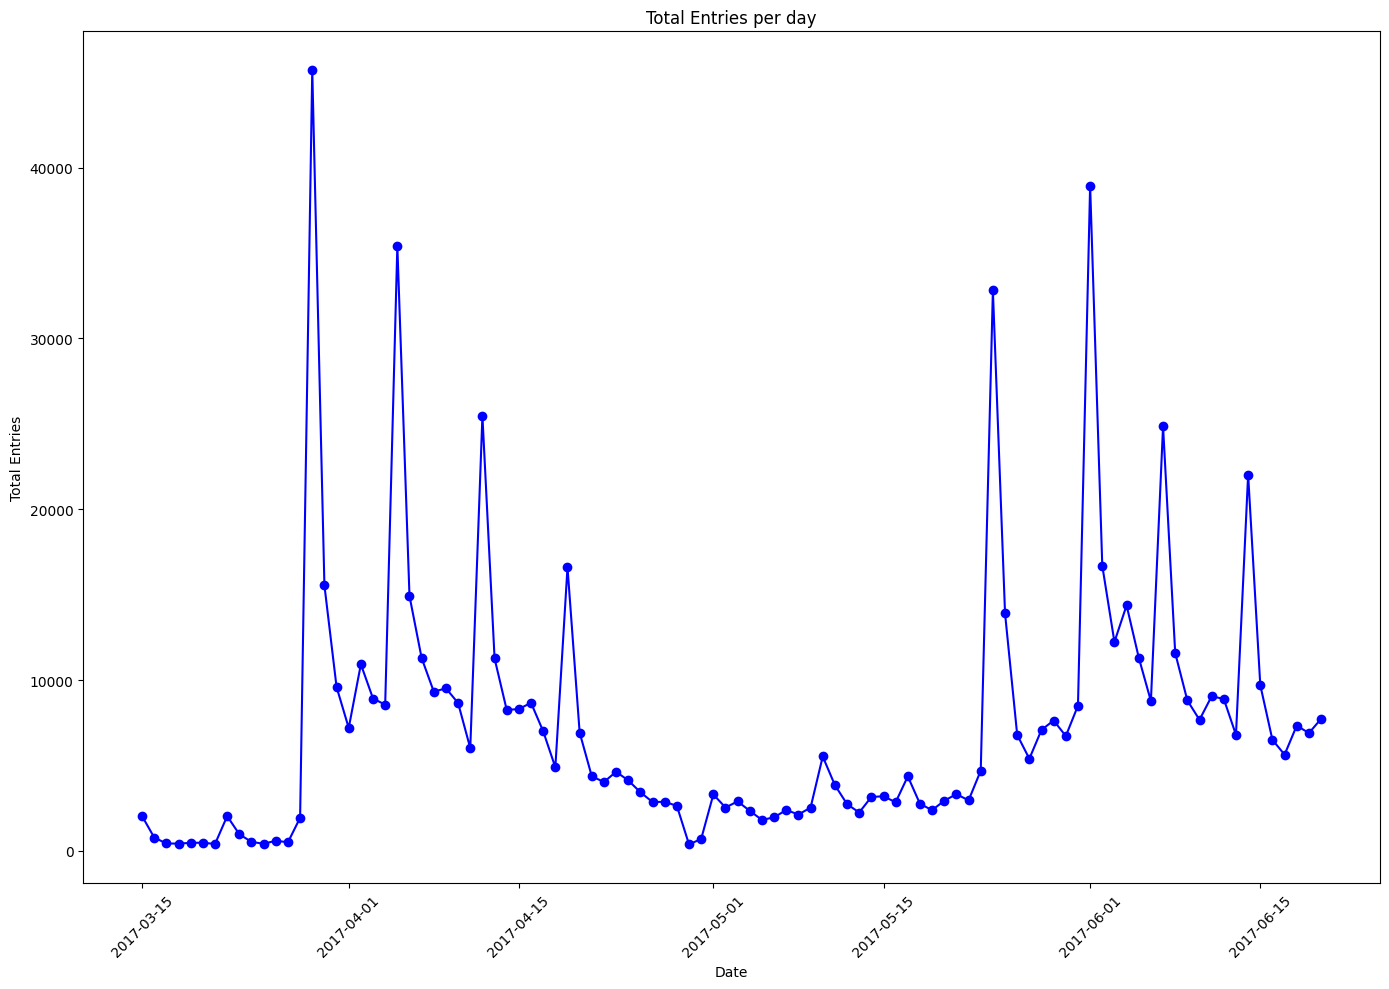

In [143]:
# Crear una figura y ejes
plt.figure(figsize=(14, 10))

# Graficar el número total de entradas por día
plt.plot(entries_per_day['date'], entries_per_day['total_entries'], marker='o', color='Blue', linestyle='-')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Date')
plt.ylabel('Total Entries')
plt.title('Total Entries per day')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

<span style="color:blue">**Additional Data Needs**</span>

When conducting an A/B testing project, there are several types of additional data that could enhance the analysis:

**1. User Demographics:** Understanding the demographic characteristics of users participating in the test could provide insights into how different demographic groups respond to the changes being tested.

**2.User Feedback:** Gathering qualitative feedback from users through surveys, interviews, or user feedback channels can provide valuable insights into user perceptions, preferences, and reasons behind their behavior.

**3.External Factors:** Consideration of external factors such as seasonality, marketing campaigns, or industry trends can help in interpreting the results of the A/B test and understanding whether observed changes are attributable to the tested variations or external factors.